In [192]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

In [193]:
model = XGBRegressor()


In [194]:
# This for Hussam in the future ... why we reorder the Dataframes 
# (because i start training the model usning defrent data frames 
# and these data frame were order in this way so i want to keep all the work without change every things)
BTC = pd.read_csv('Scripts out/BTC.csv')
BTC = BTC[::-1]
BTC.reset_index(drop=True, inplace = True)

ADA = pd.read_csv('Scripts out/ADA.csv')
ADA = ADA[::-1]
ADA.reset_index(drop=True, inplace = True)

BNB = pd.read_csv('Scripts out/BNB.csv')
BNB = BNB[::-1]
BNB.reset_index(drop=True, inplace = True)

ETH = pd.read_csv('Scripts out/ETH.csv')
ETH = ETH[::-1]
ETH.reset_index(drop=True, inplace = True)

SOL = pd.read_csv('Scripts out/SOL.csv')
SOL = SOL[::-1]
SOL.reset_index(drop=True, inplace = True)

XRP = pd.read_csv('Scripts out/XRP.csv')
XRP = XRP[::-1]
XRP.reset_index(drop=True, inplace = True)



In [195]:
print(len(BTC))
print(len(ADA))

5052
2418


#### shrink the BTC data base depending on ADA (the shorter DF)

In [196]:
df_BTC = BTC

s = ADA['date'][0]

ind = df_BTC.index[df_BTC['Start'] == s].values

df_BTC = df_BTC.iloc[ind[0]:]
df_BTC.reset_index(drop = True,inplace = True)

df_BTC.head()

,Start,High,Low,Volume
0,2017-10-02,4446.342068,4361.270626,1.177333e+09
1,2017-10-03,4466.306182,4237.159335,1.146607e+09
2,2017-10-04,4337.574576,4206.295821,9.741398e+08
3,2017-10-05,4348.467992,4157.650335,9.920291e+08
4,2017-10-06,4392.401416,4296.675659,9.624500e+08


In [197]:
print(ADA.tail(1))
print(df_BTC.tail(1))


            date      High
2417  2024-05-15  0.454413
           Start     High       Low        Volume
2417  2024-05-15  66390.0  61404.32  1.003509e+11


In [198]:
df_ADA = ADA
las = df_ADA.index[df_ADA['date'] == list(df_ADA['date'])[-1]].values
df_BTC = df_BTC.iloc[:las[0]+1]
df_BTC.tail()

,Start,High,Low,Volume
2413,2024-05-11,61391.96,60560.03,9.335287e+10
2414,2024-05-12,61763.99,60689.41,7.614435e+10
2415,2024-05-13,63332.96,60786.91,9.073478e+10
2416,2024-05-14,63053.02,61157.62,9.684300e+10
2417,2024-05-15,66390.00,61404.32,1.003509e+11


now what about BNB, ETH, SOL, XRP

In [199]:
print(len(BNB), len(ETH), len(SOL), len(XRP))

2465 3204 1498 3926


i don't want to loss a alot of information so i will won't use SOL as input for the model

attention i will keep the SOL because i get the data from other source and it was better 

In [200]:
print(len(BNB), len(ETH), len(XRP))

2465 3204 3926


In [201]:
df_XRP = XRP
df_XRP.head(1)

,date,High
0,2013-08-16,0.003162


In [202]:
print(df_XRP['date'][0])
print(df_BTC['Start'][0])

2013-08-16
2017-10-02


In [203]:
s = df_BTC['Start'][0]

ind = df_XRP.index[df_XRP['date'] == s].values
df_XRP = df_XRP.iloc[ind[0]:]
df_XRP.reset_index(drop=True, inplace=True)



In [204]:
print(list(df_XRP['date'])[-1])
print(df_BTC['Start'].tail(1).values)

2024-05-15
['2024-05-15']


BTC, ADA, XRP are done!

still BNB, ETH

In [205]:
df_BNB = BNB
print(df_BNB.head(1))
df_ETH = ETH
df_SOL = SOL
print(df_ETH.head(1))
print(df_SOL.head(1))
print(df_BTC.head(1))


         date     High
0  2017-08-16  1.45272
         date     High
0  2015-08-08  2.79881
         date      High
0  2020-04-09  0.744465
        Start         High          Low        Volume
0  2017-10-02  4446.342068  4361.270626  1.177333e+09


Excellant because the two remaining data (BNB, ETH) bases have including the BTC dates



###### I will fill the SOL DF with 0 values 

###### saving the time i merge SOL with df_ETH name 

In [206]:
df_BTC.index[df_BTC['Start'] == df_BTC['Start'][0]]

Index([0], dtype='int64')

In [207]:
df_ETH= pd.merge(df_ETH, df_SOL,how = 'left', on='date')
df_ETH = df_ETH.fillna(0)

##### here i get Error (missing row in BNB df) 24/1/2018

In [208]:
# short =  [pd.to_datetime(i).date() for i in df_BNB['date']]
# lon = [i for i in pd.date_range('2017-10-03', '2024-05-15', ).date]
# set(lon) - set(short)

In [209]:
df_BNB = df_BNB.iloc[df_BNB.index[df_BNB['date'] == df_BTC['Start'][0]].values[0]:] ## :( Sorry, i want to make the code shorter
df_ETH = df_ETH.iloc[df_ETH.index[df_ETH['date'] == df_BTC['Start'][0]].values[0]:]




In [210]:
df_ETH.reset_index(drop = True, inplace = True)
df_BNB.reset_index(drop = True, inplace = True)

In [211]:
print(df_BNB.head(1))
print(df_ETH.head(1))
print(df_BTC.head(1))

         date     High
0  2017-10-02  1.98287
         date      High_x  High_y
0  2017-10-02  301.084757     0.0
        Start         High          Low        Volume
0  2017-10-02  4446.342068  4361.270626  1.177333e+09


In [212]:
print(df_BNB.tail(1))
print(df_ETH.tail(1))
df_BTC.tail(1)



            date      High
2417  2024-05-15  587.6572
            date     High_x    High_y
2417  2024-05-15  3040.3976  158.5516


,Start,High,Low,Volume
2417,2024-05-15,66390.0,61404.32,1.003509e+11


# Done :)

In [213]:
df_prices = df_BTC[['Start','High']]
df_prices.rename(axis = 1, mapper={'Start' : 'date','High' : 'btc_high'}, inplace=True)
df_prices.head()

C:\Users\hussam\AppData\Local\Temp\ipykernel_22728\2579459158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices.rename(axis = 1, mapper={'Start' : 'date','High' : 'btc_high'}, inplace=True)


,date,btc_high
0,2017-10-02,4446.342068
1,2017-10-03,4466.306182
2,2017-10-04,4337.574576
3,2017-10-05,4348.467992
4,2017-10-06,4392.401416


In [214]:
df_ADA.columns

Index(['date', 'High'], dtype='object')

In [215]:
print(df_BNB.head())
df_ADA.head()

         date     High
0  2017-10-02  1.98287
1  2017-10-03  2.03295
2  2017-10-04  1.85747
3  2017-10-05  1.73519
4  2017-10-06  1.71358


,date,High
0,2017-10-02,0.030088
1,2017-10-03,0.027172
2,2017-10-04,0.022962
3,2017-10-05,0.022245
4,2017-10-06,0.021576


In [216]:
len(df_ADA['High']),len(df_BNB['High']),len(df_ETH[['High_x', 'High_y']]),len(df_XRP['High'])

(2418, 2418, 2418, 2418)

In [217]:
df_SOL = df_ETH[['date', 'High_y']]
df_ETH = df_ETH[['date','High_x']]

In [218]:
pd.concat([df_ADA['High'], df_BNB['High'], df_ETH['High_x'], df_SOL['High_y'], df_XRP['High']], axis= 1)

,High,High,High_x,High_y,High
0,0.030088,1.98287,301.084757,0.0000,0.206464
1,0.027172,2.03295,299.042274,0.0000,0.204199
2,0.022962,1.85747,295.132972,0.0000,0.217585
3,0.022245,1.73519,296.608512,0.0000,0.240870
4,0.021576,1.71358,307.934787,0.0000,0.242474
...,...,...,...,...,...
2413,0.450802,594.63760,2942.277100,147.4857,0.508342
2414,0.442977,599.60780,2957.482000,147.5651,0.509656
2415,0.452807,598.25870,2991.171700,150.0654,0.511454
2416,0.438039,592.95790,2962.467300,148.9396,0.509955


In [219]:
df_prices[['ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high']] = pd.concat([df_ADA['High'], df_BNB['High'], df_ETH['High_x'], df_SOL['High_y'], df_XRP['High']], axis= 1, keys=['ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high'])


C:\Users\hussam\AppData\Local\Temp\ipykernel_22728\3175460583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices[['ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high']] = pd.concat([df_ADA['High'], df_BNB['High'], df_ETH['High_x'], df_SOL['High_y'], df_XRP['High']], axis= 1, keys=['ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high'])


In [220]:
df_prices.head()

,date,btc_high,ada_high,bnb_high,eth_high,sol_high,xrp_high
0,2017-10-02,4446.342068,0.030088,1.98287,301.084757,0.0,0.206464
1,2017-10-03,4466.306182,0.027172,2.03295,299.042274,0.0,0.204199
2,2017-10-04,4337.574576,0.022962,1.85747,295.132972,0.0,0.217585
3,2017-10-05,4348.467992,0.022245,1.73519,296.608512,0.0,0.240870
4,2017-10-06,4392.401416,0.021576,1.71358,307.934787,0.0,0.242474


here i will consider all currecny prices input and the model should use them to predict the BTC prices

i know that not good (Because it is time serires probelm), but this currency will help in the future the model with other feaures like twitter and trend to predict the BTC price

In [221]:
features = ['ada_high','bnb_high','eth_high','xrp_high']

target = df_prices['btc_high']
train = df_prices[features]


In [222]:
x_train, x_test, y_train, y_test = train_test_split(train, target)


In [223]:
model = XGBRegressor(n_estimators = 100,learning_rate=0.1, max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1490.1211639566648


In [224]:
Twitter = pd.read_csv('Scripts out/Twitter_1M.csv', sep=';')
Twitter

C:\Users\hussam\AppData\Local\Temp\ipykernel_22728\619425532.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Twitter = pd.read_csv('Scripts out/Twitter_1M.csv', sep=';')


,index,date,hashtags,user_followers,user_friends,user_favourites,user_verified,is_retweet,Is_old_User,user_important
0,0,2021-02-10,['bitcoin'],8534.0,7605,4838,False,0,1,1
1,1,2021-02-10,"['Thursday', 'Btc', 'wallet', 'security']",6769.0,1532,25483,False,0,1,1
2,2,2021-02-10,"['Bitcoin', 'FX', 'BTC', 'crypto']",625.0,129,14,False,0,1,0
3,3,2021-02-10,['BTC'],1249.0,1472,10482,False,0,1,1
4,4,2021-02-10,"['Crypto', 'Binance', 'Cashback']",742.0,716,2444,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...
83247,83247,2021-04-19,"['legendary', 'NFT', 'blockchain', 'games', 'V...",210.0,954,5655,0,0,1,0
83248,83248,2021-04-19,"['legendary', 'NFT', 'blockchain', 'games', 'V...",210.0,954,5655,0,0,1,0
83249,83249,2021-04-19,"['legendary', 'NFT', 'blockchain', 'games', 'V...",210.0,954,5655,0,0,1,0
83250,83250,2021-04-19,"['legendary', 'NFT', 'blockchain', 'games', 'V...",210.0,954,5655,0,0,1,0


In [225]:
df_twitter = Twitter[['date', 'user_verified', 'is_retweet', 'Is_old_User', 'user_important']]


In [226]:
df_twitter.sort_values('date',inplace=True)
df_twitter.reset_index(drop = True, inplace = True)

C:\Users\hussam\AppData\Local\Temp\ipykernel_22728\2878129010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter.sort_values('date',inplace=True)


In [227]:
print(df_twitter['date'].min(), df_twitter['date'].max())


2021-02-05 2021-04-24


In [228]:
print(df_prices['date'].min())
df_prices['date'].max()


2017-10-02


'2024-05-15'

In [229]:
# i = df_twitter.groupby(['date']).sum()

# Google Trend

In [230]:
google = pd.read_csv('Scripts out/Google Trend.csv')
df_google = google

In [231]:
df_google['date'] = [pd.to_datetime(i) for i in df_google['date']]
df_google.head()


,date,worldwide,unitedstates,Germany,UAE,Dubai
0,2004-01-01,1,0,3,0,0
1,2004-02-01,1,0,2,0,0
2,2004-03-01,1,0,2,0,0
3,2004-04-01,1,0,1,0,0
4,2004-05-01,1,0,1,0,0


In [232]:
df_google.tail()

,date,worldwide,unitedstates,Germany,UAE,Dubai
240,2024-01-01,33,22,56,26,27
241,2024-02-01,31,21,49,25,25
242,2024-03-01,51,33,76,43,44
243,2024-04-01,38,24,57,30,33
244,2024-05-01,30,19,46,25,25


In [233]:
df_google.head()

,date,worldwide,unitedstates,Germany,UAE,Dubai
0,2004-01-01,1,0,3,0,0
1,2004-02-01,1,0,2,0,0
2,2004-03-01,1,0,2,0,0
3,2004-04-01,1,0,1,0,0
4,2004-05-01,1,0,1,0,0


In [234]:
def days_in_month(year, month_num):
  """
  This function takes a year and month number as input and returns the number of days in that month.

  Args:
      year (int): The year (e.g., 2024).
      month_num (int): The number of the month (1-12).

  Returns:
      int: The number of days in the specified month.
  """

  # Check for invalid month numbers
  if month_num < 1 or month_num > 12:
    raise ValueError("Invalid month number. Please enter a value between 1 and 12.")

  # Create a list with days in each month (considering leap years)
  days_in_month_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

  # Handle February for leap years
  if month_num == 2 and ((year % 4 == 0 and year % 100 != 0) or year % 400 == 0):
    days_in_month_list[1] = 29  # Adjust for leap year

  return days_in_month_list[month_num - 1]


In [235]:
temp_new_df = []
for i in df_google['date']:
    temp = df_google[df_google['date'] == i].values
    # print(temp[0][1:])
    for j in range(1,days_in_month(i.year, i.month)+1):
        temp_new_df.append([j, *temp[0][1:]])
print(len(temp_new_df))    
date = pd.date_range(df_google['date'][0],periods=len(temp_new_df))
print(len(date))
   
df_new_google = pd.DataFrame([pd.to_datetime(i).date() for i in date], columns=['date'])
df_new_google[['worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai']] = 0

temp_new_df = pd.DataFrame(temp_new_df,columns=['date','worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai'])

temp_new_df['date'] = df_new_google['date']
df_google_new = temp_new_df

7457
7457


In [236]:
print(df_google_new.head())
print(df_google_new.tail())

         date  worldwide  unitedstates  Germany  UAE  Dubai
0  2004-01-01          1             0        3    0      0
1  2004-01-02          1             0        3    0      0
2  2004-01-03          1             0        3    0      0
3  2004-01-04          1             0        3    0      0
4  2004-01-05          1             0        3    0      0
            date  worldwide  unitedstates  Germany  UAE  Dubai
7452  2024-05-27         30            19       46   25     25
7453  2024-05-28         30            19       46   25     25
7454  2024-05-29         30            19       46   25     25
7455  2024-05-30         30            19       46   25     25
7456  2024-05-31         30            19       46   25     25


In [237]:
df_google_new.max()

date            2024-05-31
worldwide              100
unitedstates           100
Germany                100
UAE                    100
Dubai                  100
dtype: object

Fail way

In [238]:
# df_new_google = pd.DataFrame([pd.to_datetime(i).date() for i in date], columns=['date'])
# df_new_google[['worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai']] =0
# df_new_google.head(2)

# import pandas as pd
# #### lookup the values
# df = df_new_google
# lookup_df = df_google
# lookup_df ['date'] = [pd.to_datetime(i).date() + pd.DateOffset(days = 0) for i in lookup_df ['date']]
# lookup_df = lookup_df.set_index('date')
# df['worldwide'] = df['date'].map(lookup_df['worldwide'])

# dic = []
# for i in df['worldwide']:
#     if pd.isna(i) == False:
        
#         dic.append([df.index[df['worldwide'] == i],i])
    
    
# # df['worldwide'].iloc[range()] = 5



# # for i,ind in zip(df['worldwide'],range(0,len(df))):
# #     temp = 0
# #     if pd.isna(i):
# #         df.iloc[[ind],'worldwide'] = i
# #     else : 
# #         temp = i
# dic[2]



# ori_m = [pd.to_datetime(i).date() for i in df_google['date']]

# print(pd.to_datetime(df_new_google['date'][0]).date() == ori_m[0])
# for m in ori_m:
#     while True:
#         if m == 

In [239]:
print(df_prices['date'].min())
print(df_prices['date'].max())

2017-10-02
2024-05-15


In [240]:
temp_min = df_prices['date'].min()
temp_max = df_prices['date'].max()


temp_start = df_google_new.iloc[df_google_new.index[df_google_new['date'] == pd.to_datetime(temp_min).date()]]
temp_end = df_google_new.iloc[df_google_new.index[df_google_new['date'] == pd.to_datetime(temp_max).date()]]


df_google_new = df_google_new.iloc[temp_start.index.values[0] : temp_end.index.values[0]+1]
df_google_new.reset_index(drop = True, inplace = True)


In [241]:
print(df_google_new.head())
print(df_google_new.tail())
print(df_prices.head())
print(df_prices.tail())

         date  worldwide  unitedstates  Germany  UAE  Dubai
0  2017-10-02         24            17       23   23     24
1  2017-10-03         24            17       23   23     24
2  2017-10-04         24            17       23   23     24
3  2017-10-05         24            17       23   23     24
4  2017-10-06         24            17       23   23     24


            date  worldwide  unitedstates  Germany  UAE  Dubai
2413  2024-05-11         30            19       46   25     25
2414  2024-05-12         30            19       46   25     25
2415  2024-05-13         30            19       46   25     25
2416  2024-05-14         30            19       46   25     25
2417  2024-05-15         30            19       46   25     25
         date     btc_high  ada_high  bnb_high    eth_high  sol_high  xrp_high
0  2017-10-02  4446.342068  0.030088   1.98287  301.084757       0.0  0.206464
1  2017-10-03  4466.306182  0.027172   2.03295  299.042274       0.0  0.204199
2  2017-10-04  4337.574576  0.022962   1.85747  295.132972       0.0  0.217585
3  2017-10-05  4348.467992  0.022245   1.73519  296.608512       0.0  0.240870
4  2017-10-06  4392.401416  0.021576   1.71358  307.934787       0.0  0.242474
            date  btc_high  ada_high  bnb_high   eth_high  sol_high  xrp_high
2413  2024-05-11  61391.96  0.450802  594.6376  2942.2771  147.4857  

In [242]:
full_df = df_prices[df_prices.columns]
full_df[df_google_new.columns] = df_google_new[df_google_new.columns]
full_df.info()
full_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2418 non-null   object 
 1   btc_high      2418 non-null   float64
 2   ada_high      2418 non-null   float64
 3   bnb_high      2418 non-null   float64
 4   eth_high      2418 non-null   float64
 5   sol_high      2418 non-null   float64
 6   xrp_high      2418 non-null   float64
 7   worldwide     2418 non-null   int64  
 8   unitedstates  2418 non-null   int64  
 9   Germany       2418 non-null   int64  
 10  UAE           2418 non-null   int64  
 11  Dubai         2418 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 226.8+ KB


,date,btc_high,ada_high,bnb_high,eth_high,sol_high,xrp_high,worldwide,unitedstates,Germany,UAE,Dubai
0,2017-10-02,4446.342068,0.030088,1.98287,301.084757,0.0000,0.206464,24,17,23,23,24
1,2017-10-03,4466.306182,0.027172,2.03295,299.042274,0.0000,0.204199,24,17,23,23,24
2,2017-10-04,4337.574576,0.022962,1.85747,295.132972,0.0000,0.217585,24,17,23,23,24
3,2017-10-05,4348.467992,0.022245,1.73519,296.608512,0.0000,0.240870,24,17,23,23,24
4,2017-10-06,4392.401416,0.021576,1.71358,307.934787,0.0000,0.242474,24,17,23,23,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2413,2024-05-11,61391.960000,0.450802,594.63760,2942.277100,147.4857,0.508342,30,19,46,25,25
2414,2024-05-12,61763.990000,0.442977,599.60780,2957.482000,147.5651,0.509656,30,19,46,25,25
2415,2024-05-13,63332.960000,0.452807,598.25870,2991.171700,150.0654,0.511454,30,19,46,25,25
2416,2024-05-14,63053.020000,0.438039,592.95790,2962.467300,148.9396,0.509955,30,19,46,25,25


In [243]:
epoch = pd.Timestamp("1970-01-01")
full_df['date'] = [(pd.to_datetime(i) - epoch).total_seconds() for i in full_df['date']]


In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = full_df.columns[0:1].append(full_df.columns[2:])
print(features)

scaled_full_df = pd.DataFrame(scaler.fit_transform(full_df[features].astype(int)),columns = features)
scaled_full_df[full_df.columns[7:]] = full_df[full_df.columns[7:]]

Index(['date', 'ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high',
       'worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai'],
      dtype='object')


In [245]:
print(scaled_full_df.min())
print(scaled_full_df.max())


date            -1.731335
ada_high        -0.410339
bnb_high        -0.968610
eth_high        -1.065293
sol_high        -0.623340
xrp_high        -0.296605
worldwide        9.000000
unitedstates     6.000000
Germany         10.000000
UAE              8.000000
Dubai            8.000000
dtype: float64
date              1.731335
ada_high          5.590870
bnb_high          2.666843
eth_high          2.930182
sol_high          4.121119
xrp_high          8.485317
worldwide       100.000000
unitedstates    100.000000
Germany         100.000000
UAE             100.000000
Dubai           100.000000
dtype: float64


In [246]:
print(scaled_full_df.columns)
print(full_df.columns)

Index(['date', 'ada_high', 'bnb_high', 'eth_high', 'sol_high', 'xrp_high',
       'worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai'],
      dtype='object')
Index(['date', 'btc_high', 'ada_high', 'bnb_high', 'eth_high', 'sol_high',
       'xrp_high', 'worldwide', 'unitedstates', 'Germany', 'UAE', 'Dubai'],
      dtype='object')


In [247]:
scaled_full_df.head()

,date,ada_high,bnb_high,eth_high,sol_high,xrp_high,worldwide,unitedstates,Germany,UAE,Dubai
0,-1.731335,-0.410339,-0.968610,-0.884820,-0.62334,-0.296605,24,17,23,23,24
1,-1.729902,-0.410339,-0.963325,-0.886491,-0.62334,-0.296605,24,17,23,23,24
2,-1.728469,-0.410339,-0.968610,-0.889833,-0.62334,-0.296605,24,17,23,23,24
3,-1.727037,-0.410339,-0.968610,-0.888997,-0.62334,-0.296605,24,17,23,23,24
4,-1.725604,-0.410339,-0.968610,-0.879807,-0.62334,-0.296605,24,17,23,23,24


In [248]:
features = scaled_full_df.columns
target = df_prices['btc_high']
train = scaled_full_df[features]
print(train)

# features = scaled_full_df.columns
# target = df_prices['btc_high']
# train = pd.concat([full_df['date'], scaled_full_df[features]], keys = ['date', scaled_full_df.columns])

x_train, x_test, y_train, y_test = train_test_split(train, target, shuffle=True, train_size=0.8)

import math
model = XGBRegressor(n_estimators = 100,learning_rate=0.1, max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Error (RMSE): {math.pow(mse,0.5)} o_+") 

# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_true = # Your actual target values
# mse = mean_squared_error(y_true, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_true, y_pred)
# mae = mean_absolute_error(y_true, y_pred)

          date  ada_high  bnb_high  eth_high  sol_high  xrp_high  worldwide   
0    -1.731335 -0.410339 -0.968610 -0.884820 -0.623340 -0.296605         24  \
1    -1.729902 -0.410339 -0.963325 -0.886491 -0.623340 -0.296605         24   
2    -1.728469 -0.410339 -0.968610 -0.889833 -0.623340 -0.296605         24   
3    -1.727037 -0.410339 -0.968610 -0.888997 -0.623340 -0.296605         24   
4    -1.725604 -0.410339 -0.968610 -0.879807 -0.623340 -0.296605         24   
...        ...       ...       ...       ...       ...       ...        ...   
2413  1.725604 -0.410339  2.164854  1.321799  2.069461 -0.296605         30   
2414  1.727037 -0.410339  2.191275  1.334331  2.069461 -0.296605         30   
2415  1.728469 -0.410339  2.185991  1.362739  2.124416 -0.296605         30   
2416  1.729902 -0.410339  2.154286  1.338509  2.087779 -0.296605         30   
2417  1.731335 -0.410339  2.127866  1.403680  2.270963 -0.296605         30   

      unitedstates  Germany  UAE  Dubai  
0        

### This are the predicted values with the real values

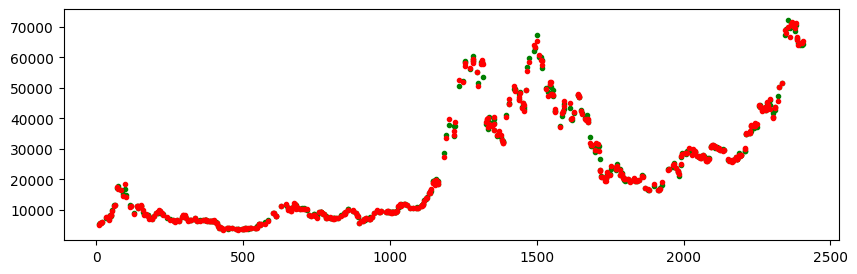

In [249]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(full_df.index[x_test.index], y_pred, 'g.',full_df.index[x_test.index], y_test, 'r.')
plt.show()

In [250]:
import pickle
with open('Model/btc_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('Model/scaler_btc_mode.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [251]:
with open('Model/btc_price_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('Model/scaler_btc_mode.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
print(model.predict(train.head(1).values))
target.head(1)

[4439.994]


0    4446.342068
Name: btc_high, dtype: float64

### Perfecto o_^